# Linear regression - Advanced model

### Note: this notebook folows the "Linear regression - Linear model" notebook

## Scope

* Finite number $N$ of data points are available: find the best fit of a given parametrique function going trouth this $N$ points.

In [1]:
#setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


## The data set : a synthetique data set with some noise

In [2]:
Nb_data_point = 200
xmin, xmax = -.5, 5.5
x = np.linspace(xmin, xmax, Nb_data_point)+ .2*np.random.rand(Nb_data_point)
y = x**4-12*x**3+47*x**2-60*x+ 5*np.random.randn(Nb_data_point)

<IPython.core.display.Javascript object>


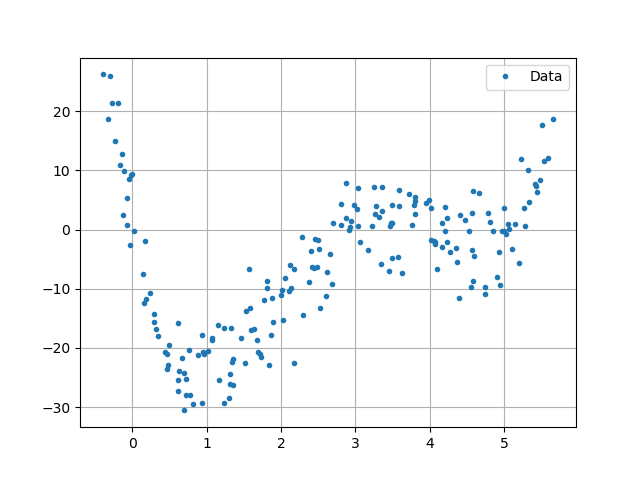

In [3]:
fig = plt.figure()
plt.plot(x,y,'.',label = "Data")
plt.legend()
plt.grid()

## We would like to fit this data with a linear piecewise function

To do so we need first a base, let's use linear piecewise function function use in the FE methode

In [4]:
def hat(x,xc,support=1):
    ### P1 function
    # in:
    # x: 
    # xc: center of the peak
    # support: 
    y = np.maximum(1-np.abs((x-xc)/support),0.)
    return y

### Bases function settings

In [5]:
Nf = 15 # number of bases function

xc_list = np.linspace(xmin,xmax,Nf)
xc_list.shape
support = (xmax-xmin)/(Nf-1)

### Draw the hat functions

In [6]:
N = 500 
x_hat = np.linspace(xmin, xmax, N)

<IPython.core.display.Javascript object>


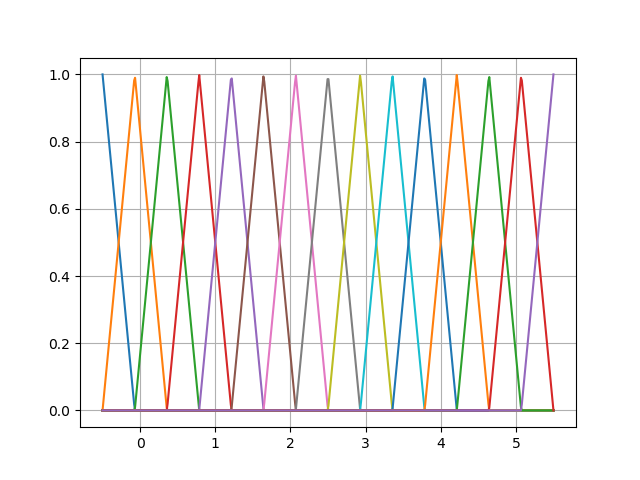

In [7]:
fig = plt.figure()
for i in range(0,len(xc_list)):
    plt.plot(x_hat,hat(x_hat,xc_list[i],support))
plt.grid()

## Fit the data using this base of functions

### Determination of the coefficent by regression

In [8]:
# Construcion of the X matrix
X = np.zeros((Nf,len(x)))         
for i in range(0,len(xc_list)):
    X[i,:] = hat(x, xc_list[i], support)
    #X = np.append(X, [hat(x, xc_list[i], support)], axis=0)
X=X.T    

# Construcion of the Y matrix
Y = y.T

# Computation of the least square estimator
beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

print("The fitted coeff:")
print(beta)

The fitted coeff:
[ 34.21181689   6.54133034 -19.68973686 -25.06030747 -22.17281562
 -17.19946533 -11.12295646  -6.45010219   2.84929182   0.23314199
   2.97368338  -1.72959454  -2.71579939  -2.05246729  12.67920535]


### Draw the results

In [9]:
N = 100
xi = np.linspace(xmin, xmax, N)

yi = np.zeros(xi.shape)
for i in range(0,len(xc_list)):
    yi = yi + beta[i] * hat(xi,xc_list[i],support)

<IPython.core.display.Javascript object>


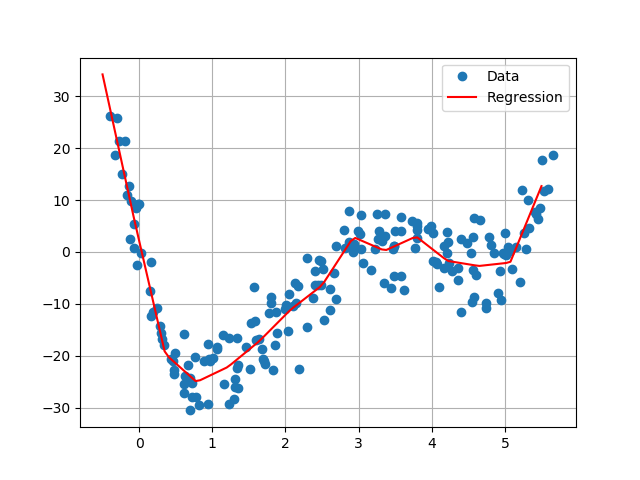

In [10]:
fig = plt.figure()
plt.plot(x,y,'o',label = "Data")
plt.plot(xi,yi,'r',label = "Regression")
plt.legend()
plt.grid()